## **Pima Indians Diabetes Database Descriptive Statistics Project**

## **Introduction**
The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough — or any — insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

According to WHO about 422 million people worldwide have diabetes. Since diabetes affects a large population across the globe and the collection of these datasets is a continuous process and it comprises of various patient related attributes such as age, gender, symptoms, insulin levels, blood pressure, blood glucose levels, weight etc. 

Columns of the dataset
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
3. Blood Pressure: Diastolic blood pressure (mm Hg)
4. Skin Thickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2) 
7. Diabetes Pedigree Function: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic


## Dataset Explaination

Diabetes is a chronic disease and a major challenge across the world. Hence, identifying factors associated with disease is very important. Accurate and fast diagnosis/prediction of the disease will help us to avoid any future complications associated with diabetes. There are certain populations which are very prone to different diseases in comparison to other populations.     

You are working as a research scientist in an Indian University. Principal investigator (PI) provided you with a raw dataset containing certain risk factors that may be associated with diabetes based on previous research. Your PI wants you to perform essential feature engineering, exploratory data analysis techniques to identify important features that may be crucial for important machine learning models. Once EDA is performed, you also have to perform appropriate models (at least 3 models) and compare which model seems to you best. Please explore more models, as lecture videos have also been provided.

## 1. Why is diabetes a challenge?

Problems such as lack of proper awareness about diabetes, lack of better healthcare facilities dedi cated towards diabetes care, a poor economy, nonadherence to treatment and diet advice, and sociocultural factors are some of the challenges in diabetes care


## 2. What are the major factors associated with diabetes?

The following are the major factors associated with: 
1. Insulin
2. Skin Thickness
3. BMI
4. Obesity
5. Increase in Glucose level
6. Blood Pressure 


## 3. Your aim in this study? You can have multiple aims.

Aim: From the dataset, 
1. It was observed that if the person is diabetes or not
2. Try different classification methods to find highest accuracy
3. Find most indicative features of diabetes


##  **Importing some of the libraries**

In [90]:
import pandas as pd
import numpy as np #as required for pandas
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sns.set()

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Reading Pima Indians Diabetes Database**

In [69]:
#importing file analysis
# importing file from a local folder
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [93]:
diabetes=pd.read_csv('diabetes.csv',encoding="ISO-8859-1")
#print the output
diabetes

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


check the  dataset is fetched properly or not and also explore the dataset.

In [94]:
# Exploring first five rows of the dataset using head function
diabetes.head() 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Head function gives first five rows of the dataset

In [95]:
diabetes.shape

(768, 9)

Shape function gives 768 rows and 9 columns of the dataset

In [91]:
# Exploring dataset again using tail function.
diabetes.tail(10) 

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The tail function gives bottom rows of the dataset. In general, it gives only last 5 rows as I mentioned in the code to give 10 rows it displays the last 10 rows of the dataset

In [74]:
# To examine the summary of continuous data
diabetes.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It describes the total values of count, mean, median, standard deviation, minimum, IQR (25%,50%,75%) and maximum value of the PIDD dataset

In [96]:
# Check datatypes of each column and be sure that python is reading each variable perfectly.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


It displays the overall dataset which consisting of 9 columns and also type of the data for each variable

In [97]:
diabetes.columns

Index([' Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness',
       'Insulin', ' BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

It displays the names of the columns available in the dataset

In [98]:
## To check if data contains null values
diabetes.isnull().sum()


 Pregnancies                  0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
Insulin                       0
 BMI                          0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

#Replace the name of the columns

In [148]:
#storing the dataset in different variable using deep copy
diabetes1 = diabetes.copy(deep = True)

In [149]:
#Checking the column name as this columns contain some of the special characters
diabetes1.columns[0]

'\xa0Pregnancies'

In [150]:
diabetes1.rename(columns={"\xa0Pregnancies":"Pregnancies", "Blood Pressure":"BloodPressure"," BMI":"BMI","Skin Thickness":"SkinThickness","Diabetes Pedigree Function":"DiabetesPedigreeFunction" }, inplace=True)

Using the rename function, am changing the name of the columns

In [151]:
#checking whether column name is changed or not
diabetes1.columns[0]

'Pregnancies'

In [152]:
#Checking the column names is it replaced or not
diabetes1.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [153]:
diabetes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Using info function it shows if any null values exists or not

In [154]:
# Replacing zero values with NaN

diabetes1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes1.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [155]:
diabetes1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feac2328590>,
      dtype=object)

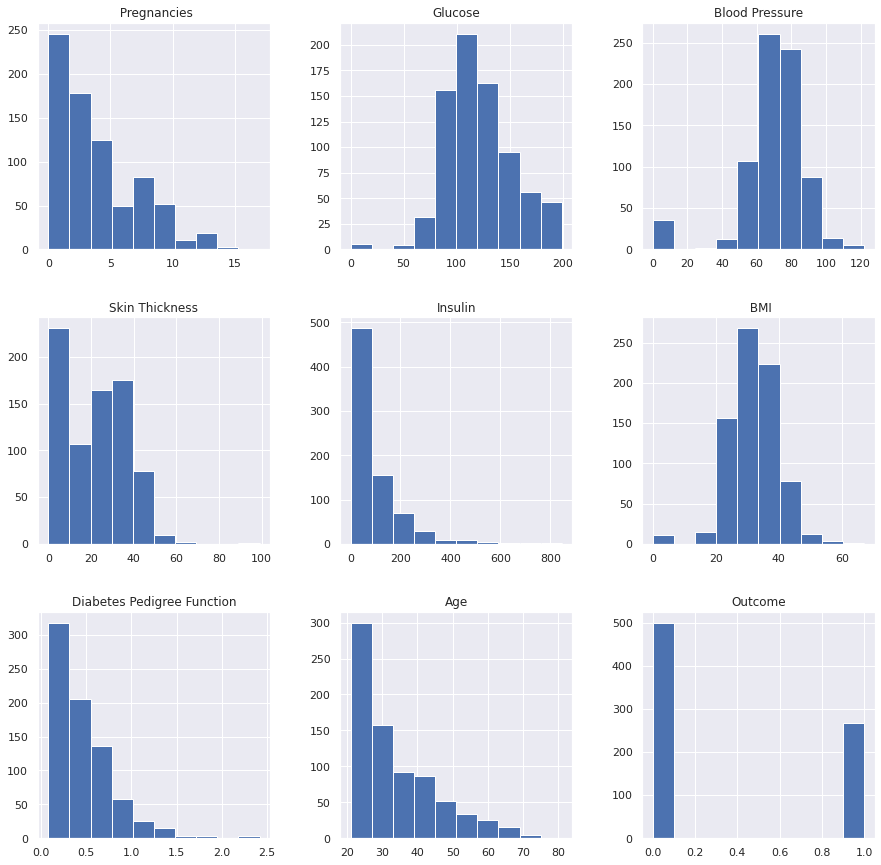

In [156]:
# plotting before replacing null values
data=diabetes.hist(figsize=(15,15))
data

Using hist function, here we have seen the distribution of each features whether it is dependent data or independent data 

It shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.

In [157]:
# Replacing missing values with approriate statistical measure
diabetes1["Glucose"].fillna(diabetes1["Glucose"].mean(), inplace = True)
diabetes1["BloodPressure"].fillna(diabetes1["BloodPressure"].mean(), inplace = True)
diabetes1["SkinThickness"].fillna(diabetes1["SkinThickness"].median(), inplace = True)
diabetes1["Insulin"].fillna(diabetes1["Insulin"].median(), inplace = True)
diabetes1["BMI"].fillna(diabetes1["BMI"].median(), inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feac1b38050>,
      dtype=object)

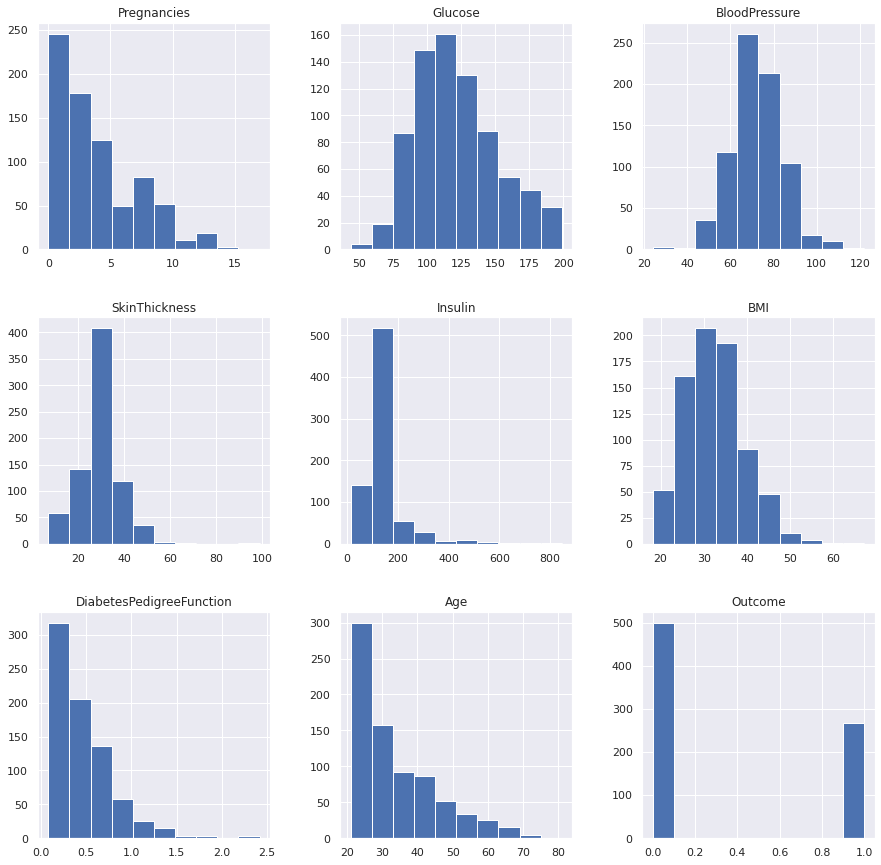

In [159]:
# plotting after replacing NaN values
data1=diabetes1.hist(figsize=(15,15))
data1

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

## Plotting null count analysis plot for better idea

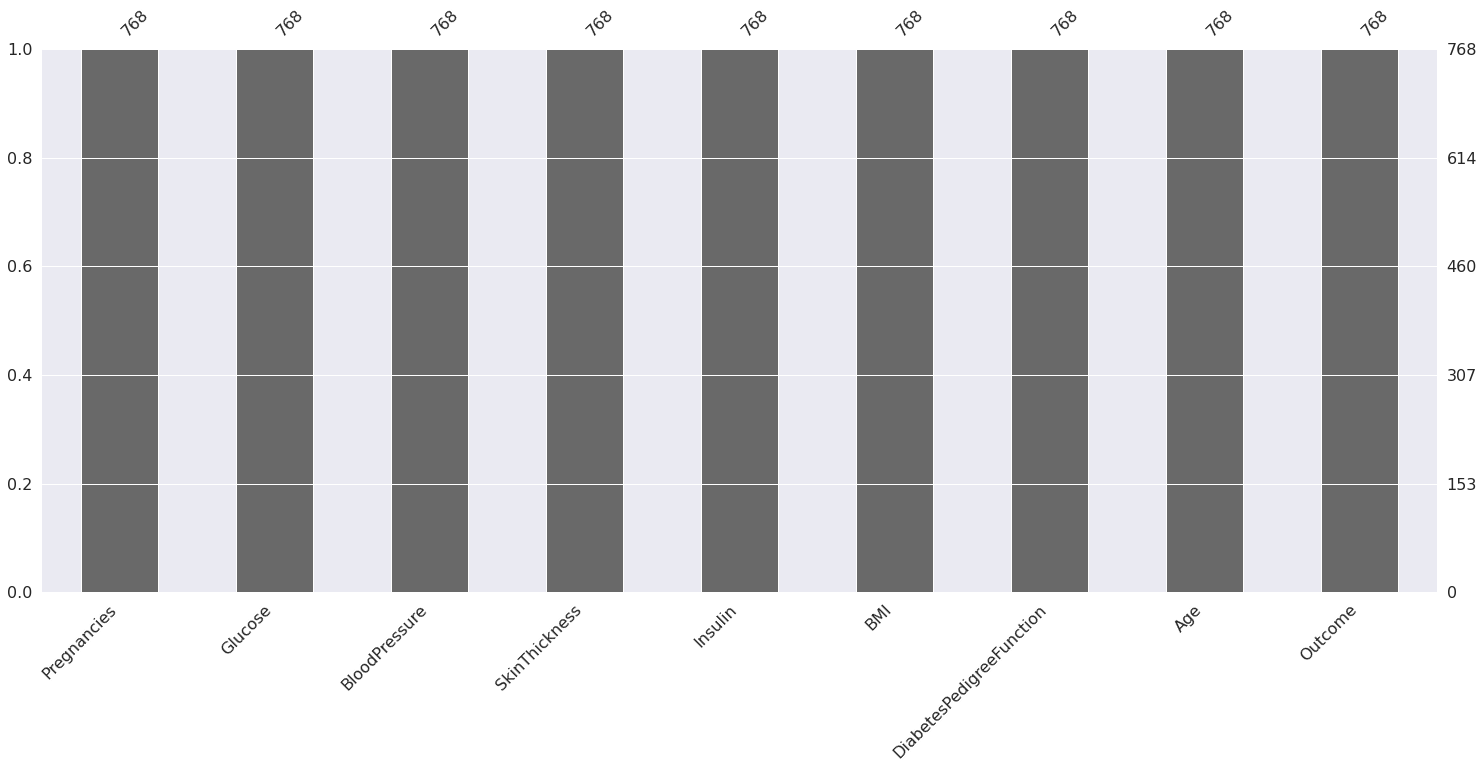

In [160]:
import missingno as msno
p=msno.bar(diabetes1)

0    500
1    268
Name: Outcome, dtype: int64


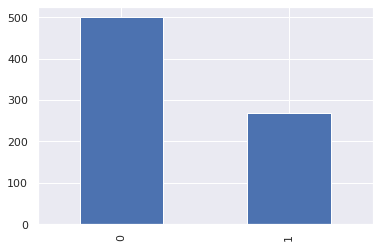

In [161]:
# checking whether the outcome variable data is balanced or not
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes1["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes1.Outcome.value_counts())
p=diabetes1.Outcome.value_counts().plot(kind="bar")

From the above plot, it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

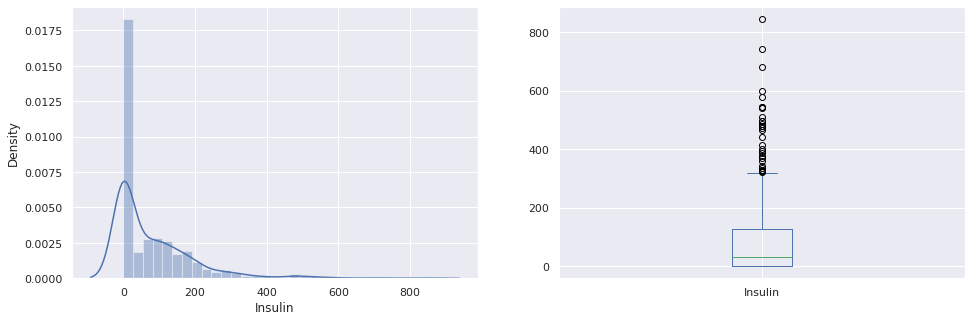

In [162]:
# Checking the outliers for insulin
# checking for outliers in the Insulin variable
import warnings
plt.subplot(121), sns.distplot(diabetes['Insulin'])
plt.subplot(122), diabetes['Insulin'].plot.box(figsize=(16,5))
plt.show()


Distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derived by the box and whiskers plot

## Diabetes Prediction Using Machine Learning


## Correlation between all the features


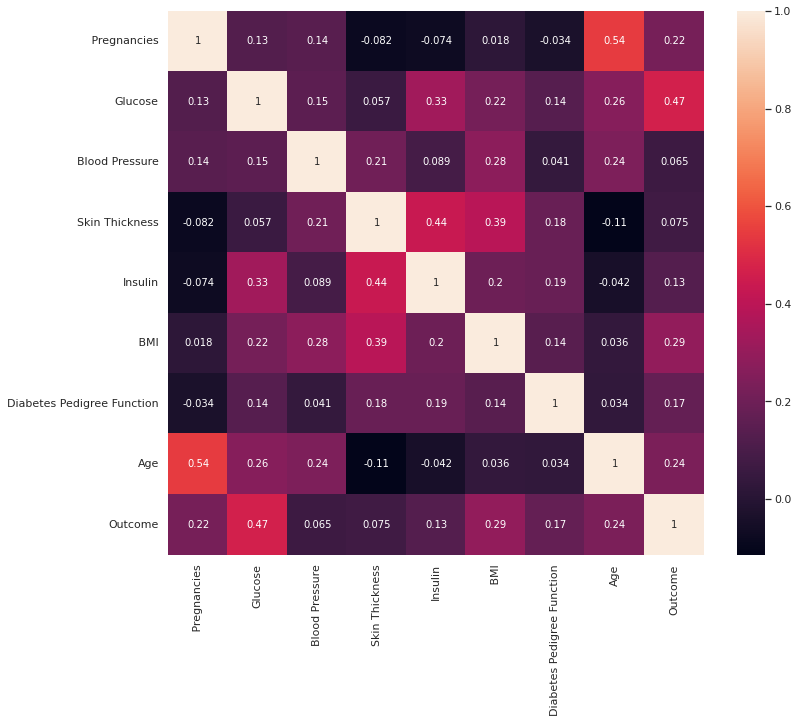

In [163]:
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes.corr(),annot=True)

## Scaling the Data


In [132]:
diabetes1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


After Standing Scale

In [165]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes1.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


From the above, our dataset will be looking like when it is scaled down or we can see every value now is on the same scale which will help our ML model to give a better result.

In [166]:
#Let’s explore our target column
y = diabetes1.Outcome
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Model Building

In [167]:
# Splitting the dataset
X = diabetes1.drop('Outcome', axis=1)
y = diabetes1['Outcome']

In [168]:
# Now we will split the data into training and testing data using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)


## 4. Perform at least three models and explain which model looks better. Justify it using evaluation matrix and appropriate graphs.

## Random Forest

In [181]:
# Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=120)
rfc.fit(X_train, y_train.ravel())



RandomForestClassifier(n_estimators=120)

 # check the accuracy of the model on the training dataset.

In [185]:
# checking for accuracy of model on training dataset
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.



In [186]:
# checking accuracy score for random forest
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7677165354330708


## Classification report and confusion matrix of random forest model



In [187]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[137  25]
 [ 34  58]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       162
           1       0.70      0.63      0.66        92

    accuracy                           0.77       254
   macro avg       0.75      0.74      0.74       254
weighted avg       0.76      0.77      0.76       254



## Decision Tree


In [188]:

# Building the model using DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)



DecisionTreeClassifier()

Now we will be making the predictions on the testing data directly as it is of more importance.



In [191]:
# Getting the accuracy score for Decision Tree
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))


Accuracy Score = 0.7125984251968503


In [190]:
# Classification report and confusion matrix of the decision tree model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[118  44]
 [ 29  63]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       162
           1       0.59      0.68      0.63        92

    accuracy                           0.71       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.73      0.71      0.72       254



## Logistic regression

In [194]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [195]:
# getting accuracy score for Logistic regression
from sklearn import metrics

predictions =lr.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7480314960629921


In [196]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[139  23]
 [ 41  51]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       162
           1       0.69      0.55      0.61        92

    accuracy                           0.75       254
   macro avg       0.73      0.71      0.71       254
weighted avg       0.74      0.75      0.74       254



##  Support Vector Machine (SVM)


Building the model using Support Vector Machine (SVM)



In [197]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [201]:
# Prediction from support vector machine model on the testing data
svc_pred = svc_model.predict(X_test)


In [202]:
# Accuracy score for SVM
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7559055118110236


In [203]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[147  15]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.75      0.49      0.59        92

    accuracy                           0.76       254
   macro avg       0.75      0.70      0.71       254
weighted avg       0.75      0.76      0.74       254



Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.76.




## 5. Conclusion should include the aim of the study.




After using all these patient records, we are able to build a machine learning model (random forest – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.

